In [1]:
#pip install plotly

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import requests
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
plt.style.use('bmh')

In [3]:
''' 
https://poloniex.com/support/api/ 
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400 
''' 

' \nhttps://poloniex.com/support/api/ \nhttps://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400 \n'

In [4]:
ret = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400')
ret

<Response [200]>

In [5]:
js = ret.json()
js

[{'date': 1424304000,
  'high': 244,
  'low': 225,
  'open': 225,
  'close': 244,
  'volume': 46.27631267,
  'quoteVolume': 0.19311748,
  'weightedAverage': 239.62777823},
 {'date': 1424390400,
  'high': 245,
  'low': 240.25,
  'open': 240.25011809,
  'close': 240.25,
  'volume': 55.894897,
  'quoteVolume': 0.23042935,
  'weightedAverage': 242.56847926},
 {'date': 1424476800,
  'high': 245,
  'low': 245,
  'open': 245,
  'close': 245,
  'volume': 14.72223865,
  'quoteVolume': 0.06009077,
  'weightedAverage': 245},
 {'date': 1424563200,
  'high': 249,
  'low': 235,
  'open': 245,
  'close': 235,
  'volume': 129.12124785,
  'quoteVolume': 0.53905499,
  'weightedAverage': 239.53260845},
 {'date': 1424649600,
  'high': 235.001,
  'low': 235,
  'open': 235.00000236,
  'close': 235,
  'volume': 96.56756248,
  'quoteVolume': 0.41092569,
  'weightedAverage': 235.00006166},
 {'date': 1424736000,
  'high': 239.75,
  'low': 235,
  'open': 235,
  'close': 239.75,
  'volume': 149.15439319,
  'quote

In [6]:
df = pd.DataFrame(js)
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000000,225.000000,225.000000,244.000000,4.627631e+01,0.193117,239.627778
1,1424390400,245.000000,240.250000,240.250118,240.250000,5.589490e+01,0.230429,242.568479
2,1424476800,245.000000,245.000000,245.000000,245.000000,1.472224e+01,0.060091,245.000000
3,1424563200,249.000000,235.000000,245.000000,235.000000,1.291212e+02,0.539055,239.532608
4,1424649600,235.001000,235.000000,235.000002,235.000000,9.656756e+01,0.410926,235.000062
...,...,...,...,...,...,...,...,...
2578,1647043200,39410.000000,38666.512607,38728.125594,38804.602246,6.417448e+06,164.328492,39052.558852
2579,1647129600,39304.283367,37584.217106,38804.602246,37770.271090,7.339743e+06,190.136488,38602.494173
2580,1647216000,39905.841646,37574.700000,37761.640284,39657.097032,1.547576e+07,398.285544,38855.940343
2581,1647302400,39878.960894,38138.440830,39659.917615,39280.336780,1.598103e+07,409.027258,39070.823075


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2583 non-null   int64  
 1   high             2583 non-null   float64
 2   low              2583 non-null   float64
 3   open             2583 non-null   float64
 4   close            2583 non-null   float64
 5   volume           2583 non-null   float64
 6   quoteVolume      2583 non-null   float64
 7   weightedAverage  2583 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 161.6 KB


In [8]:
df.describe()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
count,2.583000e+03,2583.000000,2583.000000,2583.000000,2583.000000,2.583000e+03,2583.000000,2583.000000
mean,1.535846e+09,12577.448104,11815.625540,12220.159819,12235.917826,1.959384e+07,2327.532210,12202.665060
std,6.443645e+07,16947.924840,15937.393159,16480.193372,16488.452087,2.997544e+07,4395.237808,16452.921152
min,1.424304e+09,219.010000,99.000000,191.300000,178.719313,0.000000e+00,0.000000,207.450144
25%,1.480075e+09,758.003476,731.292877,748.900000,749.546897,6.332010e+05,299.607913,744.395527
50%,1.535846e+09,6789.000000,6511.110000,6636.891919,6642.911276,9.004374e+06,863.184784,6627.571902
75%,1.591618e+09,11407.584180,10641.654304,11023.816165,11030.082380,2.626187e+07,2237.707329,10988.142792
max,1.647389e+09,69000.000000,66264.546095,67480.458536,67523.947762,3.960385e+08,48896.616808,67407.001192


In [9]:
scaler = MinMaxScaler()
df[['close']] = scaler.fit_transform(df[['close']])
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000000,225.000000,225.000000,0.000969,4.627631e+01,0.193117,239.627778
1,1424390400,245.000000,240.250000,240.250118,0.000914,5.589490e+01,0.230429,242.568479
2,1424476800,245.000000,245.000000,245.000000,0.000984,1.472224e+01,0.060091,245.000000
3,1424563200,249.000000,235.000000,245.000000,0.000836,1.291212e+02,0.539055,239.532608
4,1424649600,235.001000,235.000000,235.000002,0.000836,9.656756e+01,0.410926,235.000062
...,...,...,...,...,...,...,...,...
2578,1647043200,39410.000000,38666.512607,38728.125594,0.573550,6.417448e+06,164.328492,39052.558852
2579,1647129600,39304.283367,37584.217106,38804.602246,0.558192,7.339743e+06,190.136488,38602.494173
2580,1647216000,39905.841646,37574.700000,37761.640284,0.586209,1.547576e+07,398.285544,38855.940343
2581,1647302400,39878.960894,38138.440830,39659.917615,0.580615,1.598103e+07,409.027258,39070.823075


In [10]:
price = df['close'].values.tolist()
price

[0.0009693439164567483,
 0.0009136606841575663,
 0.0009841927784031966,
 0.0008357041589387116,
 0.0008357041589387116,
 0.0009062362531843419,
 0.0008765385292914449,
 0.0008876751757512812,
 0.001043588226188991,
 0.0009099493633148862,
 0.001073285950081888,
 0.0013405654651179612,
 0.0013141344907047947,
 0.0015039029465288953,
 0.0011623809036240126,
 0.0012069257075999246,
 0.0012069257851109838,
 0.0012069261680631334,
 0.0012663212345301535,
 0.0016672404279398294,
 0.0014445074988915902,
 0.0014445075153738268,
 0.00143129201294716,
 0.0014311435283368879,
 0.0015352043528575996,
 0.0014296586367966526,
 0.0014296586372421192,
 0.0012379598292164905,
 0.0012788879723597455,
 0.0012597999946426272,
 0.0012543378657217147,
 0.001318542352209373,
 0.0012169265851009066,
 0.0009474493788043338,
 0.001020951357102696,
 0.0009474492695167097,
 0.0011082208675832973,
 0.0010395566975083328,
 0.0010282839497951332,
 0.001123071118640781,
 0.0010486150063751093,
 0.001043588226188991,


In [11]:
''' RNN Model 
Many to Many
Many to One

X
(5, 1)
 0.0009693439164567483,
 0.0009136606841575663,
 0.0009841927784031966,
 0.0008357041589387116,
 0.0008357041589387116,
Y
(samples, 1)
'''

' RNN Model \nMany to Many\nMany to One\n\nX\n(5, 1)\n 0.0009693439164567483,\n 0.0009136606841575663,\n 0.0009841927784031966,\n 0.0008357041589387116,\n 0.0008357041589387116,\nY\n(samples, 1)\n'

In [12]:
window_size = 5
X = []
Y = []

# ... len(price) - window_size 
for i in range(len(price) - window_size):
    # i = 0
    X.append( [price[i + j] for j in range(window_size)] ) # j = 0,1,2,3,4
    Y.append(price[window_size + i])

print(X)
print(Y)

[[0.0009693439164567483, 0.0009136606841575663, 0.0009841927784031966, 0.0008357041589387116, 0.0008357041589387116], [0.0009136606841575663, 0.0009841927784031966, 0.0008357041589387116, 0.0008357041589387116, 0.0009062362531843419], [0.0009841927784031966, 0.0008357041589387116, 0.0008357041589387116, 0.0009062362531843419, 0.0008765385292914449], [0.0008357041589387116, 0.0008357041589387116, 0.0009062362531843419, 0.0008765385292914449, 0.0008876751757512812], [0.0008357041589387116, 0.0009062362531843419, 0.0008765385292914449, 0.0008876751757512812, 0.001043588226188991], [0.0009062362531843419, 0.0008765385292914449, 0.0008876751757512812, 0.001043588226188991, 0.0009099493633148862], [0.0008765385292914449, 0.0008876751757512812, 0.001043588226188991, 0.0009099493633148862, 0.001073285950081888], [0.0008876751757512812, 0.001043588226188991, 0.0009099493633148862, 0.001073285950081888, 0.0013405654651179612], [0.001043588226188991, 0.0009099493633148862, 0.001073285950081888, 0

In [13]:
X = np.asarray(X)
Y = np.asarray(Y)
print(X)
print(Y)

[[0.00096934 0.00091366 0.00098419 0.0008357  0.0008357 ]
 [0.00091366 0.00098419 0.0008357  0.0008357  0.00090624]
 [0.00098419 0.0008357  0.0008357  0.00090624 0.00087654]
 ...
 [0.62009326 0.58272946 0.57241482 0.5735504  0.55819176]
 [0.58272946 0.57241482 0.5735504  0.55819176 0.58620898]
 [0.57241482 0.5735504  0.55819176 0.58620898 0.58061452]]
[0.00090624 0.00087654 0.00088768 ... 0.58620898 0.58061452 0.60677174]


In [14]:
print(f"X.shape: {X.shape}, Y.shape: {Y.shape}")

X.shape: (2578, 5), Y.shape: (2578,)


In [15]:
train_test_split = 2000 # 577
X_train = X[:train_test_split, :]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:, :]
Y_test = Y[train_test_split:]

In [16]:
print(f"X_train.shape: {X_train.shape}, Y_train.shape: {Y_train.shape}")
print(f"X_test.shape: {X_test.shape}, Y_test.shape: {Y_test.shape}")

X_train.shape: (2000, 5), Y_train.shape: (2000,)
X_test.shape: (578, 5), Y_test.shape: (578,)


In [17]:
X_train[0]

array([0.00096934, 0.00091366, 0.00098419, 0.0008357 , 0.0008357 ])

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))

In [19]:
X_train[0]

array([[0.00096934],
       [0.00091366],
       [0.00098419],
       [0.0008357 ],
       [0.0008357 ]])

In [20]:
# Build a RNN model 
# 1. input 
i = Input(shape=(5, 1)) # T x D
# 2. SimpleRNN
# x = SimpleRNN(128, activation='relu')(i)
x = LSTM(128, activation='relu')(i)
# 3. Dense
x = Dense(1)(x)
model = Model(i, x)
# 4. loss = mse, optimizer = adam
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


2022-03-16 11:34:44.874163: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
# Method 2
# model = Sequential()
# model.add(SimpleRNN(128, input_shape=(5,1,), activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='linear'))
# model.compile(loss='mse', optimize='adam')
# model.summary()

In [22]:
model.fit(X_train, Y_train, epochs=30, batch_size=1)

Epoch 1/30
2000/2000 [==============================] - 7s 3ms/step - loss: 1.7924e-04
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 7.0220e-05
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 5.4978e-05
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 4.4552e-05
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 4.2565e-05
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 3.7243e-05
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 3.7837e-05
Epoch 8/30
2000/2000 [==============================] - 4s 2ms/step - loss: 3.3620e-05
Epoch 9/30
2000/2000 [==============================] - 3s 2ms/step - loss: 3.3484e-05
Epoch 10/30
2000/2000 [==============================] - 3s 2ms/step - loss: 3.1438e-05
Epoch 11/30
2000/2000 [==============================] - 4s 2ms/step - loss: 3.0661e-05
Epoch 12/30
2000/2000 [==================

In [23]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

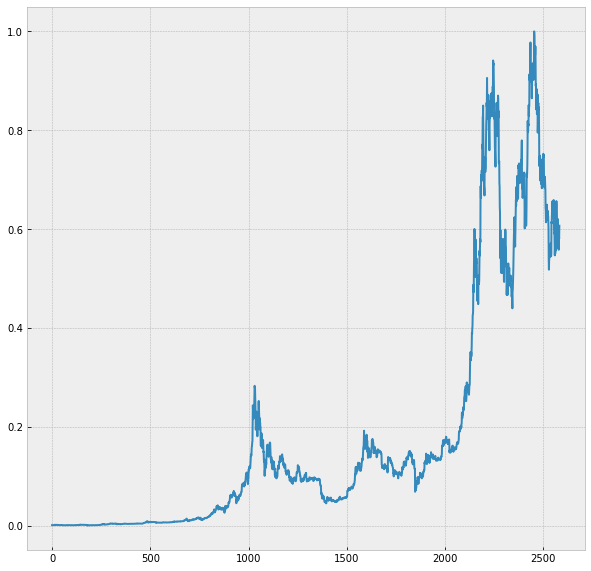

In [24]:
plt.figure(figsize=(10,10))
plt.plot(price)

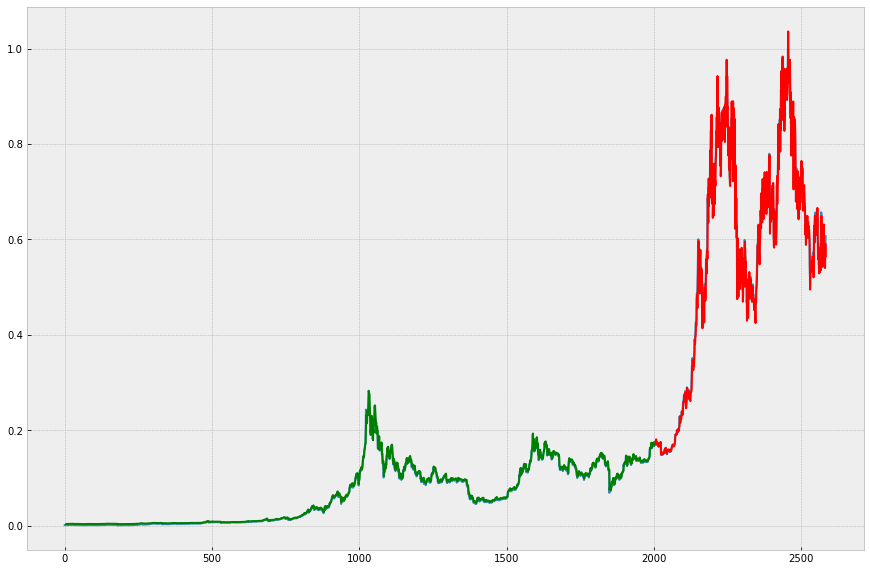

In [25]:
plt.figure(figsize=(15, 10))
plt.plot(price)

split_pt = train_test_split + window_size 

#1
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g')

#2
plt.plot(np.arange(split_pt, split_pt + len(test_predict), 1), test_predict, color='r')

In [26]:
train_predict.shape

(2000, 1)

In [27]:
trace = go.Scatter(x=np.arange(window_size, split_pt, 1), 
                   y=train_predict.reshape(2000), mode='lines', name='train')

In [29]:
trace2 = go.Scatter(x=np.arange(split_pt, split_pt + len(test_predict), 1), 
                   y=test_predict.reshape(578), mode='lines', name='test')

In [30]:
trace3 = go.Scatter(x=np.arange(1, len(price), 1), 
                   y=price, mode='lines', name='original')

In [31]:
data = [trace, trace2, trace3]

In [32]:
py.offline.plot(data)

'temp-plot.html'

#### Predict

In [33]:
train_predict[389]

array([0.00522229], dtype=float32)

In [34]:
print(f"X_test[389]: {X_test[389]}")
print(f"test_predict[389]: {test_predict[389]}")

X_test[389]: [[0.73840754]
 [0.76618926]
 [0.77940238]
 [0.69276616]
 [0.6816593 ]]
test_predict[389]: [0.68654287]


In [35]:
scaler.inverse_transform(test_predict)

array([[11938.947 ],
       [11983.811 ],
       [12348.937 ],
       [12035.737 ],
       [11826.7   ],
       [11906.372 ],
       [11590.342 ],
       [11733.929 ],
       [11710.442 ],
       [11824.115 ],
       [11415.925 ],
       [11533.923 ],
       [11395.866 ],
       [11596.658 ],
       [11553.132 ],
       [11797.007 ],
       [11737.403 ],
       [12002.558 ],
       [11481.859 ],
       [10278.691 ],
       [10494.946 ],
       [10235.195 ],
       [10339.357 ],
       [10474.24  ],
       [10251.083 ],
       [10336.045 ],
       [10442.5625],
       [10500.133 ],
       [10559.102 ],
       [10452.291 ],
       [10775.057 ],
       [10889.276 ],
       [11068.626 ],
       [11055.957 ],
       [11043.793 ],
       [11174.061 ],
       [11022.115 ],
       [10534.8   ],
       [10614.158 ],
       [10332.342 ],
       [10814.28  ],
       [10791.925 ],
       [10845.645 ],
       [10883.832 ],
       [10803.444 ],
       [10939.95  ],
       [10883.643 ],
       [10734